![SparkPdf](https://stabrise.com/media/filer_public_thumbnails/filer_public/de/31/de3156f0-386d-4b3b-ac7e-8856a38f7c1e/sparkpdflogo.png__808x214_subsampling-2.webp)

<p align="center">
    <a target="_blank" href="https://colab.research.google.com/github/StabRise/spark-pdf-tutorials/blob/master/1.QuickStart.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://pypi.org/project/pyspark-pdf/" alt="Package on PyPI"><img src="https://img.shields.io/pypi/v/pyspark-pdf.svg" /></a>    
    <a href="https://github.com/stabrise/spark-pdf/blob/main/LICENSE"><img alt="GitHub" src="https://img.shields.io/github/license/stabrise/spark-pdf.svg?color=blue"></a>
    <a href="https://stabrise.com"><img alt="StabRise" src="https://img.shields.io/badge/powered%20by-StabRise-orange.svg?style=flat&colorA=E1523D&colorB=007D8A"></a>
</p>

# Quick Star with Spark-Pdf

Spark-Pdf is open-source library for deal with documents built on top of the Apace Spark.

Supported formats:
- Pdf files (scanned and searchable)
- Images

## Installation

In [ ]:
%%bash
[[ ! "${COLAB_RELEASE_TAG}" ]] && exit
sudo apt install tesseract-ocr

In [ ]:
!pip install pyspark-pdf[ml]

## Start Spark Session with Spark Pdf

In [ ]:
from sparkpdf import *

spark = SparkPdfSession()
spark

## Read Pdf file to the Spark DataFrame and show it


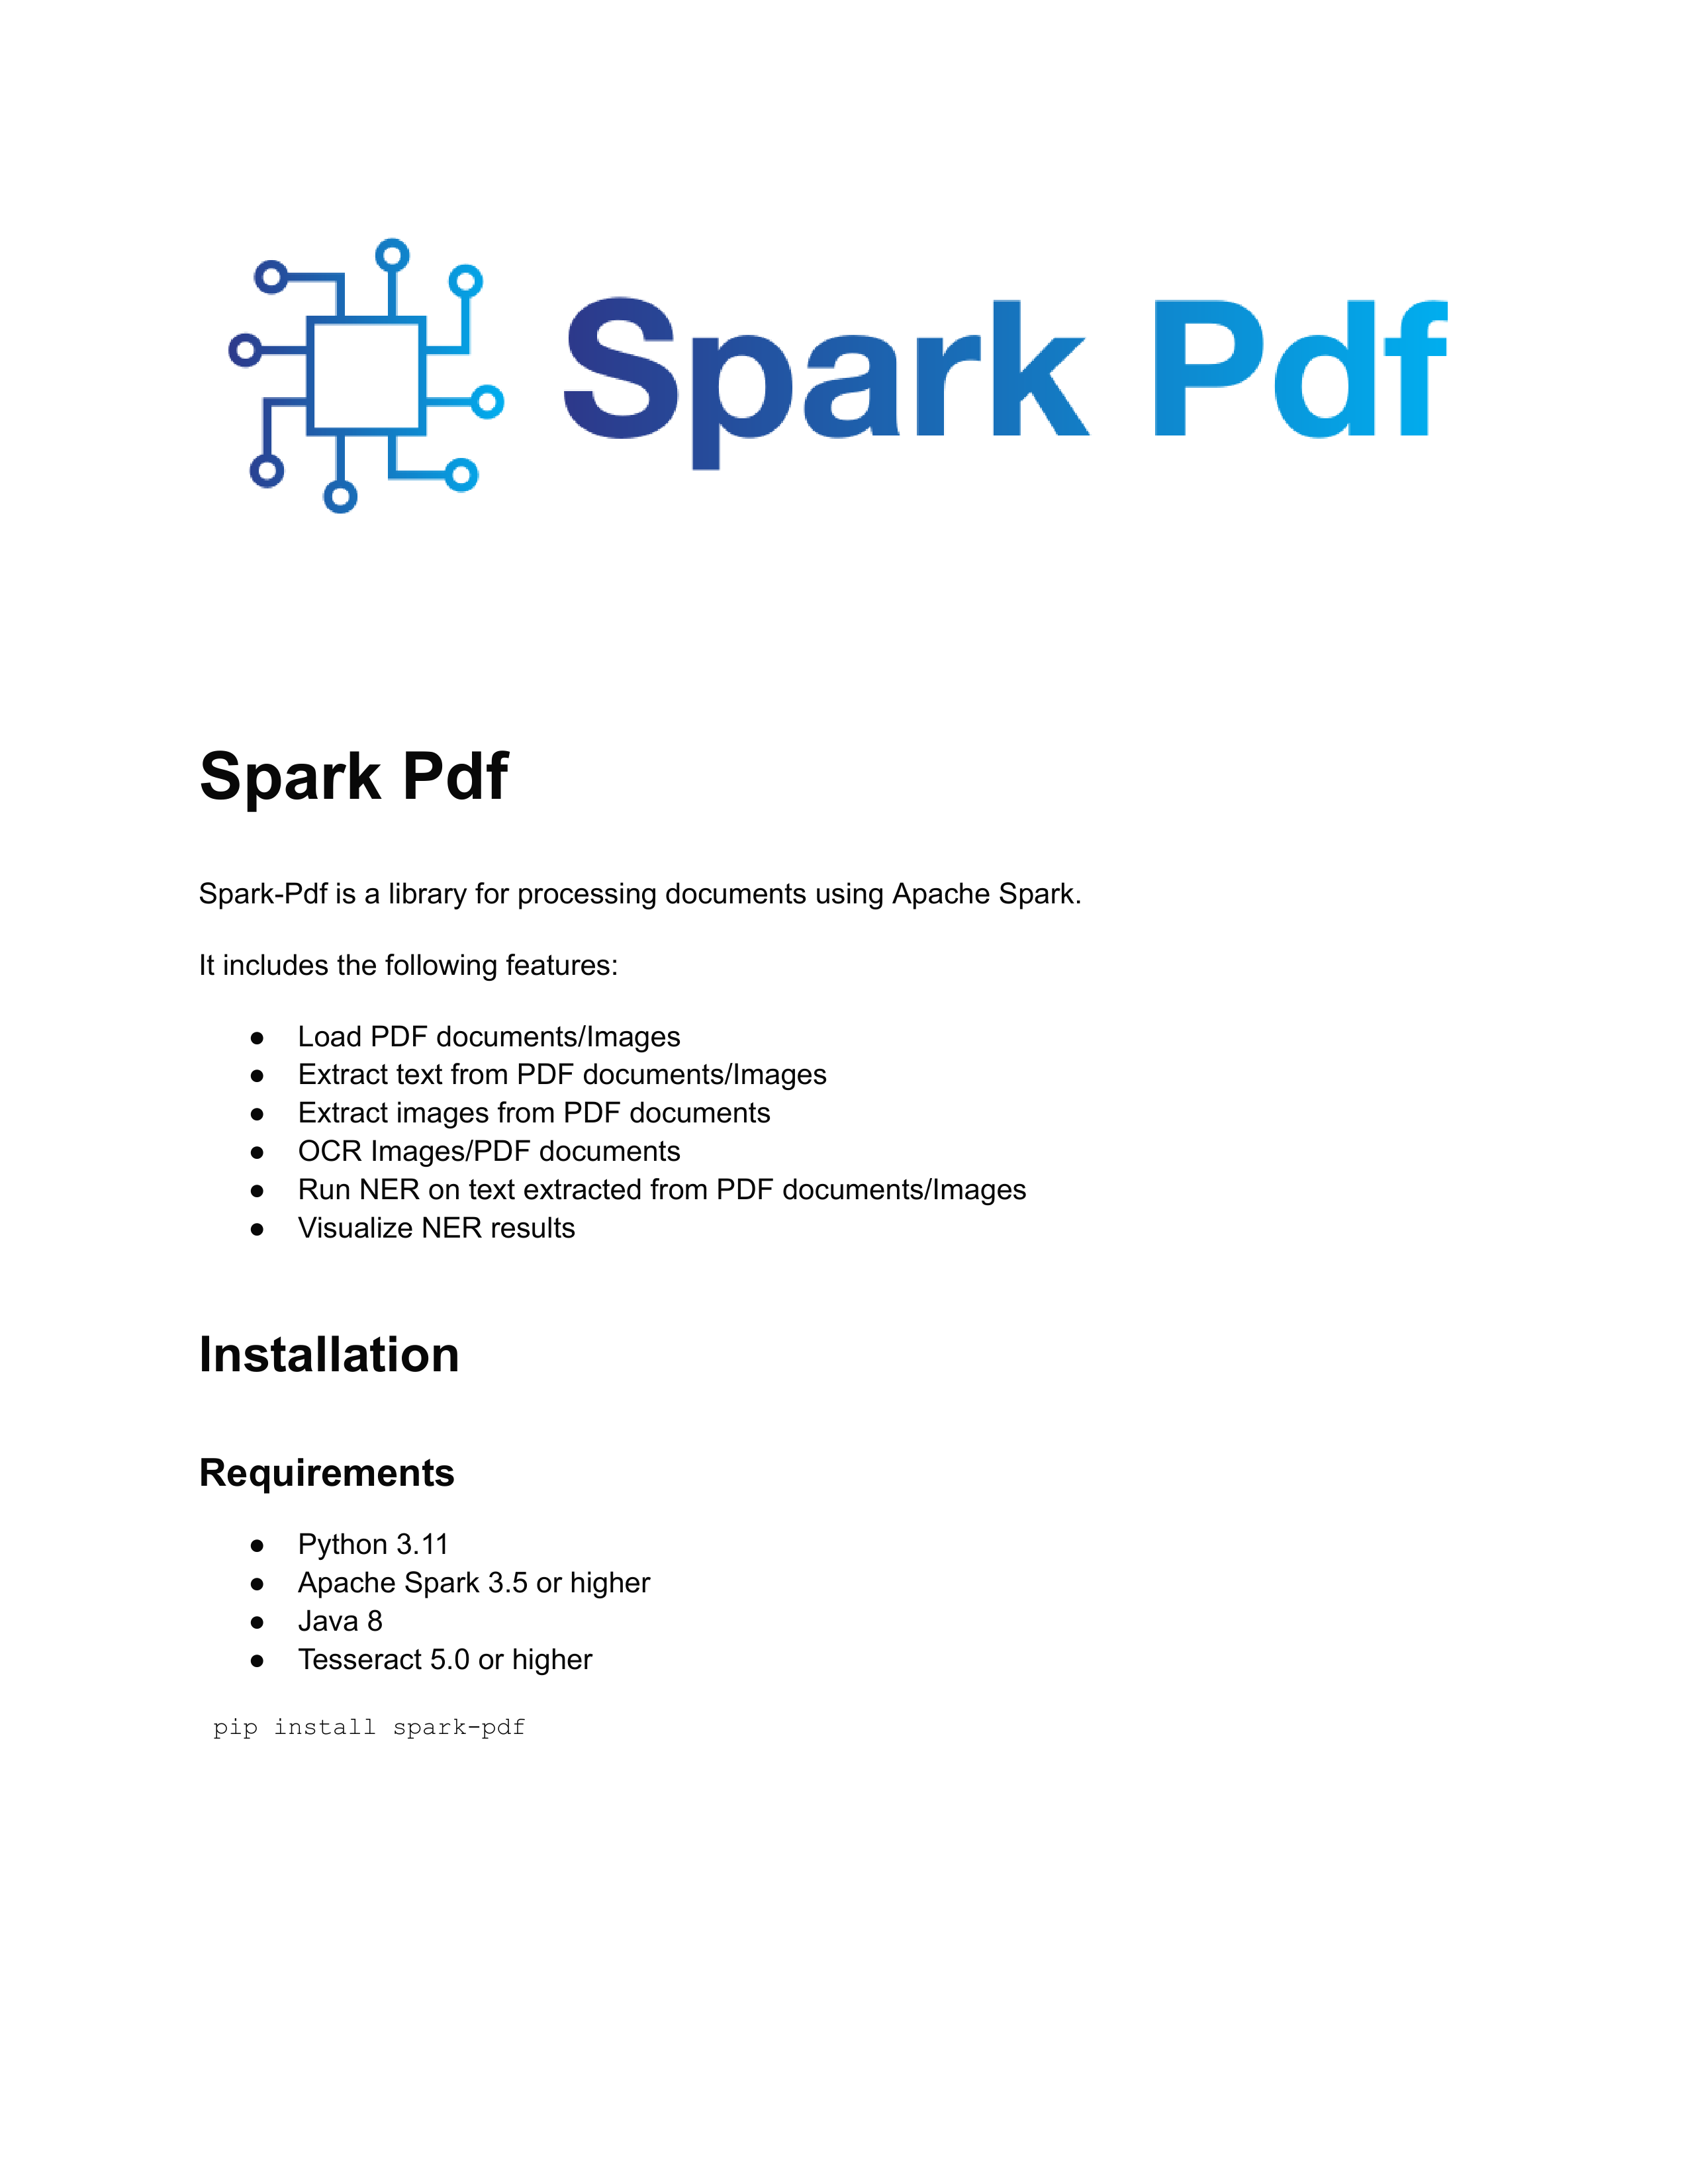

In [2]:
pdf_example = files('resources/pdfs/SparkPdf.pdf')

df = spark.read.format("binaryFile") \
    .load(pdf_example)

df.show_pdf()

## Define pipeline for extract text from the PDF and call it

In [3]:
pipeline = PipelineModel(stages=[
    PdfDataToImage(),
    TesseractOcr(keepFormatting=True, psm=PSM.SPARSE_TEXT)
])

result = pipeline.transform(df).cache()
result.show()

+--------------------+--------------------+------+----+--------------------+
|                path|    modificationTime|length|page|                text|
+--------------------+--------------------+------+----+--------------------+
|file:/home/nmelni...|2024-11-18 19:06:...| 84947|   0|{file:/home/nmeln...|
+--------------------+--------------------+------+----+--------------------+


## Show schema of result DataFrame

In [4]:
result.printSchema()

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- page: integer (nullable = true)
 |-- text: struct (nullable = true)
 |    |-- path: string (nullable = false)
 |    |-- text: string (nullable = false)
 |    |-- type: string (nullable = false)
 |    |-- bboxes: array (nullable = false)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- text: string (nullable = false)
 |    |    |    |-- score: double (nullable = false)
 |    |    |    |-- x: integer (nullable = false)
 |    |    |    |-- y: integer (nullable = false)
 |    |    |    |-- width: integer (nullable = false)
 |    |    |    |-- height: integer (nullable = false)
 |    |-- exception: string (nullable = false)


## Show coordinates for each word

In [5]:
from pyspark.sql.functions import  explode
result.select(explode("text.bboxes").alias("bboxes")).select("bboxes.*").show()

+----------------+------------------+----+----+-----+------+
|            text|             score|   x|   y|width|height|
+----------------+------------------+----+----+-----+------+
|           Spark|0.9651048299999999| 852| 448|  794|   263|
|             Pdf|0.9118479899999999|1745| 453|  442|   210|
|           Spark|0.9682291399999999| 304|1134|  272|    93|
|             Pdf|        0.96166916| 613|1134|  157|    74|
|       Spark-Pdf|        0.86371033| 302|1333|  194|    41|
|             for|0.9669332900000001| 718|1333|   52|    33|
|           Spark|0.9690411400000001|1510|1333|  112|    41|
|              is|        0.94951027| 509|1334|   28|    32|
|         library|        0.96251343| 590|1334|  115|    40|
|      processing|        0.96082161| 784|1334|  206|    40|
|       documents|0.9621209000000001|1006|1334|  211|    32|
|           using|        0.96825851|1234|1334|   99|    40|
|          Apache|        0.96818832|1348|1334|  147|    40|
|               a|0.9634

## Show recognized text

In [6]:
result.show_text()

## Collect recognized text to the local variable

In [7]:
text = result.select("text.text").collect()[0][0]
print(text)







                                        Spark    Pdf









              Spark Pdf


              Spark-Pdf is a library for processing documents using Apache Spark
              It includes the following features:
                     Load PDF documents/Images
                     Extract text from PDF documents/Images
                     Extract images from PDF documents
                     OCR Images/PDF documents
                     Run NER on text extracted from PDF documents/Images
                     Visualize NER results

              Installation

              Requirements
                     Python 3.11
                     Apache Spark 3.5 or higher
                     Java 8
                     Tesseract 5.0 or higher
               pip install spark-pdf
